1. metrics.pairwise.**laplacian**_kernel(X[, Y, gamma])
2. metrics.pairwise.**rbf**_kernel(X[, Y, gamma])
3. metrics.pairwise.**sigmoid**_kernel(X[, Y, …])

---

[Distance metrics](https://numerics.mathdotnet.com/distance.html)  measure distance between  d(a,b) < d(a,c) 

[Kernels:](http://scikit-learn.org/stable/modules/metrics.html) similarity s(a,b) > s(a,c)   ( a,b )“more similar” than(  a,c)
METRICS 
1. SCORING FUNC
2. PERFORMANCE METRICS
3. PAIRWISE METRICS
  * RBF_kernel 
  * sigmoid_kernel 
  * lablacian_kernel

---
#**1. Laplacian kernel** 
---
* Laplacian of Gaussian (LoG) 
* Laplacian filters are derivative filters used to find areas of rapid change (edges) in images
* The function laplacian_kernel is a variant on the radial basis function kernel defined as: 
> K(x, y) = exp(-gamma ||x-y||_1) for each pair of rows x in X and y in Y.
 * x and y are the input vectors and  ||x-y||_1 is the Manhattan distance between the input vectors.
  ![alt text](http://www.giassa.net/wp-content/uploads/2010/01/gammavalues.png)
 
* The Laplacian of an image highlights regions of rapid intensity change 
*  Often used for **edge detection**
* This is called a negative Laplacian because the central peak is negative.

     ![alt text](http://academic.mu.edu/phys/matthysd/web226/images/Image173.gif)
---

![alt text](https://image1.slideserve.com/2821049/laplacian-filter-cont-n.jpg)

![alt text](https://cdn-images-1.medium.com/max/400/1*G6ovS0wsA9ZC8bWRSkTTYQ.jpeg)![alt text](https://cdn-images-1.medium.com/max/400/1*RRPLax20NNXcSCBgpb4eDg.png)![alt text](https://cdn-images-1.medium.com/max/400/1*QcDNUtUPOC-KY3PPgRnDRA.png)



more: [laplacian_kernel,](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.laplacian_kernel.html)




---
#**2. RBF kernel:**  Radial basis function kernel

---

* rbf, is a popular kernel function used in various kernelized learning algorithms. 
* In particular, it is commonly used in support vector machine classification.
* One-class SVM with non-linear kernel (RBF)
* One-class SVM is an unsupervised algorithm that estimates outliers in a dataset.
* Computes the radial basis function (RBF) kernel between two vectors. 
*  x and y are the input vectors. 
  > K(x, y) = exp(-gamma ||x-y||^2)  for each pair of rows x in X and y in Y.

> To "raise" the points you use the RBF kernel, 
* gamma controls the shape of the "peaks" where you raise the points.
* A small gamma gives you a pointed bump in the higher dimensions, a large gamma gives you a softer, broader bump.
> So a small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.

[link text](https://colab.research.google.com/drive/1Qp19N2NK-3bV7cDJ1c3uSUX7Bt4uYxbu#scrollTo=BF1u37n-rbhS)
more:[RBF_kernel](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel) 



/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


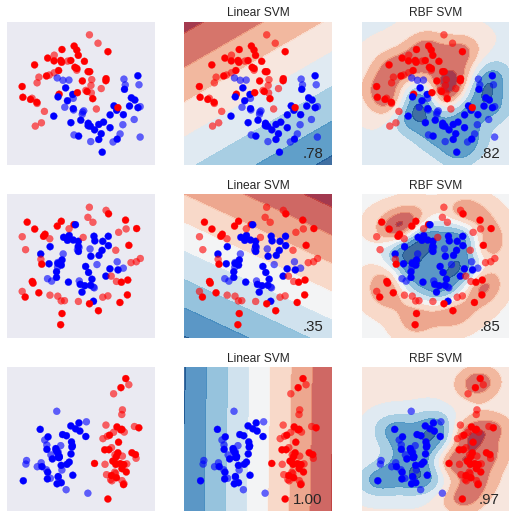

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
 
h = .02  # step size in the mesh
names = ["Linear SVM", "RBF SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]
 
X, y = make_classification(n_features=2, n_redundant=0,
        random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += rng.uniform(size=X.shape)
linearly_separable = (X, y)
 
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
 
figure = plt.figure(figsize=(9, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=0.4)
 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
 
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
      cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
      cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
 
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
 
        # Plot the decision boundary. We'll assign a color to
        # each point in the mesh [x_min, m_max]x[y_min, y_max].
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
 
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
 
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
          cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
          cmap=cm_bright, alpha=0.6)
 
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, 
          ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1
 
plt.show()

---
#**3. Sigmoid kernel:**
---
* Also knowing as Hyperbolic Tangent Kernel 
* The function sigmoid_kernel computes the sigmoid kernel between two vectors. 
* The sigmoid kernel is known as hyperbolic tangent, or Multilayer Perceptron (because, in the neural network field, it is often used as neuron activation function).  
> K(X, Y) = tanh(gamma <X, Y> + coef0)
  * x, y are the input vectors
 * coef0 is known as intercept
 
* The Sigmoid Kernel comes from the Neural Networks field, where the bipolar sigmoid function is often used as an activation function for artificial neurons.

 
![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTB_k-0iWP0WtwCNr-VnCaHegu5-hpBJ_NIt38CXSsh0DayP3Vt)

![alt text](https://i.stack.imgur.com/dDEF4.png)

![alt text](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d_hyperplane.png)

more:[sigmoid_kernel](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html)